# Neural & Behavioral Modeling - Week 5 (Exercises)
by 李采蓉 b08207042@ntu.edu.tw

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Drifit Diffusion Model (4+4 points)

Use whatever analytical methods to check if Tren's super EZ implementation(s) of the drift diffusion model produce exGaussian data, especially the exponential long tail. Remember to play around with different model parameters to see how they affect simulation results.

Hints:

[1] For parameter estimation of the ex-Gaussian distribution, you can use scipy.stats.exponnorm.fit().

[2a] You can compare two distributions by Q-Q plots or the Kolmogorov–Smirnov test

[2b] Alternatively, you can compare AIC/BIC to answer whether Exponential, Gaussian, or ex-Gaussian best fits Tren's data.

<font color="red">Please carry out the same analysis for both types of diffusion (4 points each)!</font>

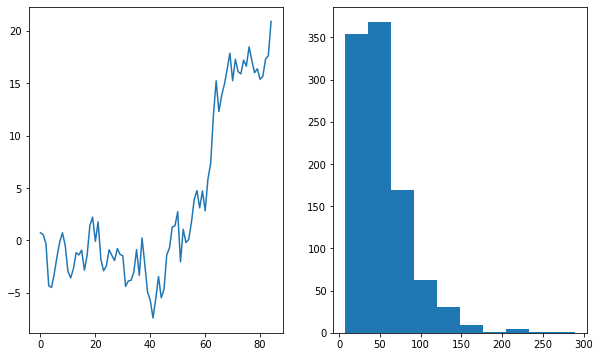

In [2]:
# Tren's implementation
from numpy import *

mu,sigma=0.2,2 # Diffusion type1
Yend=20 # Threshold for response
Ntrial=1000

RTs_1=zeros(Ntrial)
for i in range(Ntrial):
    Y=0 # initial drift position
    Ys_1=[] # drift history
    RT=0 # Reset watch
    while(Y<Yend):
        dY=mu+random.normal(mu,sigma); # type1
        #dY=float((random.rand(1)-p)>0); # type2
        Y=Y+dY
        Ys_1.append(Y); # Diffusion history in each trial
        RT=RT+1 # clock is running
    RTs_1[i]=RT;
figure(figsize=(10, 6))
subplot(1,2,1);plot(Ys_1) # plot only the last trial to see the diffusion process
subplot(1,2,2);hist(RTs_1);

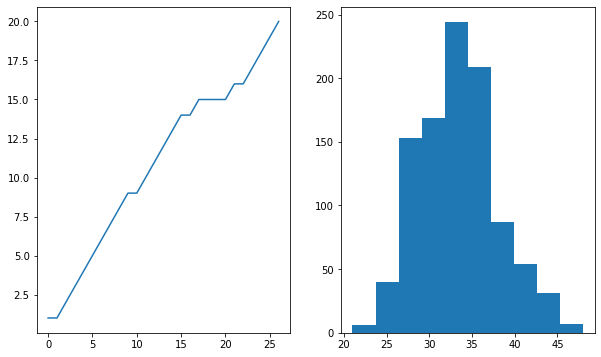

In [3]:
p=0.4 # Diffusion type2
Yend=20 # Threshold for response
Ntrial=1000

RTs_2=zeros(Ntrial)
for i in range(Ntrial):
    Y=0 # initial drift position
    Ys_2=[] # drift history
    RT=0 # Reset watch
    while(Y<Yend):
        dY=float((random.rand(1)-p)>0); # type2
        Y=Y+dY
        Ys_2.append(Y); # Diffusion history in each trial
        RT=RT+1 # clock is running
    RTs_2[i]=RT;
figure(figsize=(10, 6))
subplot(1,2,1);plot(Ys_2) # plot only the last trial to see the diffusion process
subplot(1,2,2);hist(RTs_2);

### [1] For parameter estimation of the ex-Gaussian distribution, you can use scipy.stats.exponnorm.fit().

In [4]:
import scipy.stats
from scipy.stats import exponnorm

#### (i) point estimation

In [5]:
# MLE
shape_1, loc_1, scale_1=scipy.stats.exponnorm.fit(RTs_1) # shape=K; location=mean: scale=std
print('type 1\nmean:',loc_1, 'std:',scale_1)
shape_2, loc_2, scale_2=scipy.stats.exponnorm.fit(RTs_2) # shape=K; location=mean; scale=std
print('type 2\nmean:',loc_2, 'std:',scale_2)

type 1
mean: 18.786942521838064 std: 6.885218148986929
type 2
mean: 30.595597394949976 std: 3.597183814204335


#### (ii) interval estimation

In [6]:
for i in range(2):
    if i==0:
        mean=loc_1
        std=scale_1
    else:
        mean=loc_2
        std=scale_2
    interval=scipy.stats.norm.interval(0.95,mean,std)
    print('type {}\ninterval:'.format(i+1),interval)

type 1
interval: (5.292162924122149, 32.281722119553976)
type 2
interval: (23.545246673339058, 37.645948116560895)


### [2a] You can compare two distributions by Q-Q plots or the Kolmogorov–Smirnov test

In [7]:
from scipy.stats import ks_2samp

In [8]:
ks_2samp(RTs_1, RTs_2)

KstestResult(statistic=0.491, pvalue=9.691515433227226e-110)

In [9]:
from scipy.stats import kstest

In [10]:
for i in range(2):
    if i==0:
        loc=loc_1
        scale=scale_1
        K=shape_1
    else:
        loc=loc_2
        scale=scale_2
        K=shape_2

    Ex = scipy.stats.expon(loc, scale)
    G = scipy.stats.norm(loc, scale)
    exG = scipy.stats.exponnorm(loc, scale, K)
    
    if i==0:
        ex = kstest(RTs_1, Ex.cdf)
        g = kstest(RTs_1, G.cdf)
        exg = kstest(RTs_1, exG.cdf)         
    else:
        ex = kstest(RTs_2, Ex.cdf)
        g = kstest(RTs_2, G.cdf)
        exg = kstest(RTs_2, exG.cdf)
    
    print('type {}\n' 'Exponential: {}\n' 'Gaussian: {}\n' 'ex-Gaussian: {}\n'.format(i+1, ex, g, exg))

type 1
Exponential: KstestResult(statistic=0.5639151456990595, pvalue=1.4300619024166933e-300)
Gaussian: KstestResult(statistic=0.686297925797545, pvalue=0.0)
ex-Gaussian: KstestResult(statistic=0.2994877252428274, pvalue=4.917546585177347e-80)

type 2
Exponential: KstestResult(statistic=0.278, pvalue=7.999013940165876e-69)
Gaussian: KstestResult(statistic=0.28902967050742745, pvalue=1.8238244799208578e-74)
ex-Gaussian: KstestResult(statistic=0.58111939567767, pvalue=3.933e-321)



## Parameters change

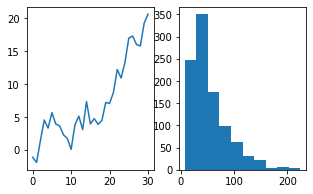

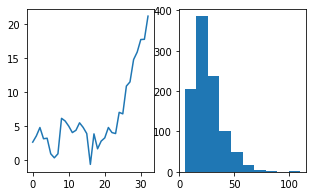

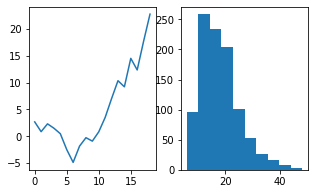

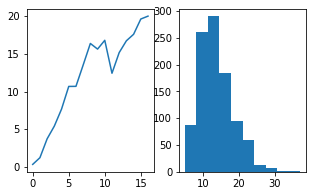

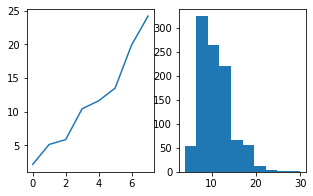

In [11]:
RTs_1 = [[0] * Ntrial for n in range(5)]

for j in range(5):
    mu,sigma=0.2*(j+1),2 # Diffusion type1
    Yend=20 # Threshold for response
    Ntrial=1000

    for i in range(Ntrial):
        Y=0 # initial drift position
        Ys_1=[] # drift history
        RT=0 # Reset watch
        while(Y<Yend):
            dY=mu+random.normal(mu,sigma); # type1
            Y=Y+dY
            Ys_1.append(Y); # Diffusion history in each trial
            RT=RT+1 # clock is running
        RTs_1[j][i]=RT;
    figure(figsize=(5, 3))
    subplot(1,2,1);plot(Ys_1) # plot only the last trial to see the diffusion process
    subplot(1,2,2);hist(RTs_1[j]);

In [ ]:
RTs_2 = [[0] * Ntrial for n in range(5)]

for j in range(5):
    p=0.4*(i+1) # Diffusion type2
    Yend=20 # Threshold for response
    Ntrial=1000

    for i in range(Ntrial):
        Y=0 # initial drift position
        Ys_2=[] # drift history
        RT=0 # Reset watch
        while(Y<Yend):
            dY=float((random.rand(1)-p)>0); # type2
            Y=Y+dY
            Ys_2.append(Y); # Diffusion history in each trial
            RT=RT+1 # clock is running
        RTs_2[j][i]=RT;
    figure(figsize=(5, 3))
    subplot(1,2,1);plot(Ys_2) # plot only the last trial to see the diffusion process
    subplot(1,2,2);hist(RTs_2[j]);

## 2 Replicate exisiting findings/models (4+4 points)

Based on your personal interest, please choose and replicate ONE of the following studies. You can replicate 2 core figures/tables <font color="red">(4points each)</font> instead of everything in the paper.

### 2.1 Embodied Cognition

2.1.1 Thelen, E., Schöner, G., Scheier, C., & Smith, L. B. (2001). The dynamics of embodiment: A field theory of infant perseverative reaching. Behavioral and Brain Sciences, 24(1), 1-86.


### 2.2 Instructed Learning

2.2.1 Biele, G., Rieskamp, J., & Gonzalez, R. (2009). Computational models for the combination of advice and individual learning. Cognitive Science, 33(2), 206-242.

2.2.2 Doll, B. B., Jacobs, W. J., Sanfey, A. G., & Frank, M. J. (2009). Instructional control of reinforcement learning: A behavioral and neurocomputational investigation. Brain Research, 1299, 74–94.

2.2.3 Li, J., Delgado, M. R., & Phelps, E. A. (2011). How instructed knowledge modulates the neural systems of reward learning. Proceedings of the National Academy of Sciences, U.S.A., 108, 55–60. (Their <a href=http://www.pnas.org/lookup/suppl/doi:10.1073/pnas.1014938108/-/DCSupplemental/sapp.pdf>supplementary document</a> contains more details about their model.)

In [1]:
### Write your analysis or codes here